In [2]:
#importation de pandas , numpy , scipystats 
#suppression des messages d'erreur
import warnings
warnings.filterwarnings('ignore')
import pandas as pd 
import numpy as np
%matplotlib inline 
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from datetime import datetime as dt

In [3]:
#importation des deux dataframes 

df_notes = pd.read_csv("movies.csv") # importation du fichier scrappé source: metacritic 

df_games = pd.read_csv("vgsales.csv") #importation du fichier vgsales source : kaggle

#affichage des premières lignes 

display(df_notes.head(6)) # affichage 6 lignes 
print("\a")
display(df_games.head(6)) # affichage 6 lignes 

,metagames,Release_dates,Platform,Meta_scores,User_scores
0,The Legend of Zelda: Ocarina of Time,"November 23, 1998",Nintendo 64,99,9.1
1,Tony Hawk's Pro Skater 2,"September 20, 2000",PlayStation,98,7.4
2,Grand Theft Auto IV,"April 29, 2008",PlayStation 3,98,7.8
3,SoulCalibur,"September 8, 1999",Dreamcast,98,8.4
4,Grand Theft Auto IV,"April 29, 2008",Xbox 360,98,7.9
5,Super Mario Galaxy,"November 12, 2007",Wii,97,9.1





,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26


In [4]:
#preprocessing du dataframe qui contient les notes des jeux vidéos

df_notes.isna().sum() # recherche des NaN : pas de NaN

df_notes.info() # meta_scores est deja en int 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19519 entries, 0 to 19518
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Movie_names    19519 non-null  object
 1   Release_dates  19519 non-null  object
 2   Platform       19519 non-null  object
 3   Meta_scores    19519 non-null  int64 
 4   User_scores    19519 non-null  object
dtypes: int64(1), object(4)
memory usage: 762.6+ KB


In [5]:
#suppression de toutes lignes contenant le word 'tbd'

df_notes= df_notes[df_notes["User_scores"].str.contains("tbd")==False]


In [6]:
#modification de la var User_scores en float64
df_notes["User_scores"]= df_notes["User_scores"].astype(float)

In [7]:
#verifications
df_notes.info() # les variables quantitatives ont été transformées en int et float


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18121 entries, 0 to 19518
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Movie_names    18121 non-null  object 
 1   Release_dates  18121 non-null  object 
 2   Platform       18121 non-null  object 
 3   Meta_scores    18121 non-null  int64  
 4   User_scores    18121 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 849.4+ KB


In [8]:
#changement du format de la date  %Y%M%D
df_notes['Release_dates']=pd.to_datetime(df_notes['Release_dates'])

In [9]:
#modification du format en %Y 
df_notes['Release_dates'] = df_notes['Release_dates'].dt.year

In [10]:
#changement du nom de la colonne movie_names en Name et Release_dates en Year
df_notes.rename(columns = {"Movie_names" : "Name", "Release_dates": 'Year'}, inplace = True)


In [11]:
#Preprocessing du dataframe vg sales 

df_games.head(4) # affichage des premières lignes

df_games.isna().sum() # Recherche de NaN:   Year et  Publisher ont des NaN

#suppression des lignes Years NaN 
df_games=df_games.dropna(subset=['Year'])


In [12]:
#informations sur les  keys variables pour la fusion des deux df 
df_games.info() #Year datetime64 , Name : object 

df_notes.info() # Year datetime64, Name : object 


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16327 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16327 non-null  int64  
 1   Name          16327 non-null  object 
 2   Platform      16327 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16327 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16327 non-null  float64
 7   EU_Sales      16327 non-null  float64
 8   JP_Sales      16327 non-null  float64
 9   Other_Sales   16327 non-null  float64
 10  Global_Sales  16327 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 18121 entries, 0 to 19518
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         18121 non-null  object 
 1   Year         18121 non-null  in

In [13]:
#remplace les NaN par le mode de la Variable 'Publisher'

df_games['Publisher'].mode() #Electronic Arts
df_games['Publisher']= df_games['Publisher'].fillna(df_games['Publisher'].mode()[0])


In [14]:
#changement de la colonne year en integer

df_games['Year'] = df_games['Year'].astype(int)

In [15]:
#renomer la variable year en Year
df_games.rename(columns = {"year" : "Year"}, inplace = True)


Text(0.5, 1.0, "Une très forte corrélation entre les ventes américaines et les ventes à l'échelle mondiale ")

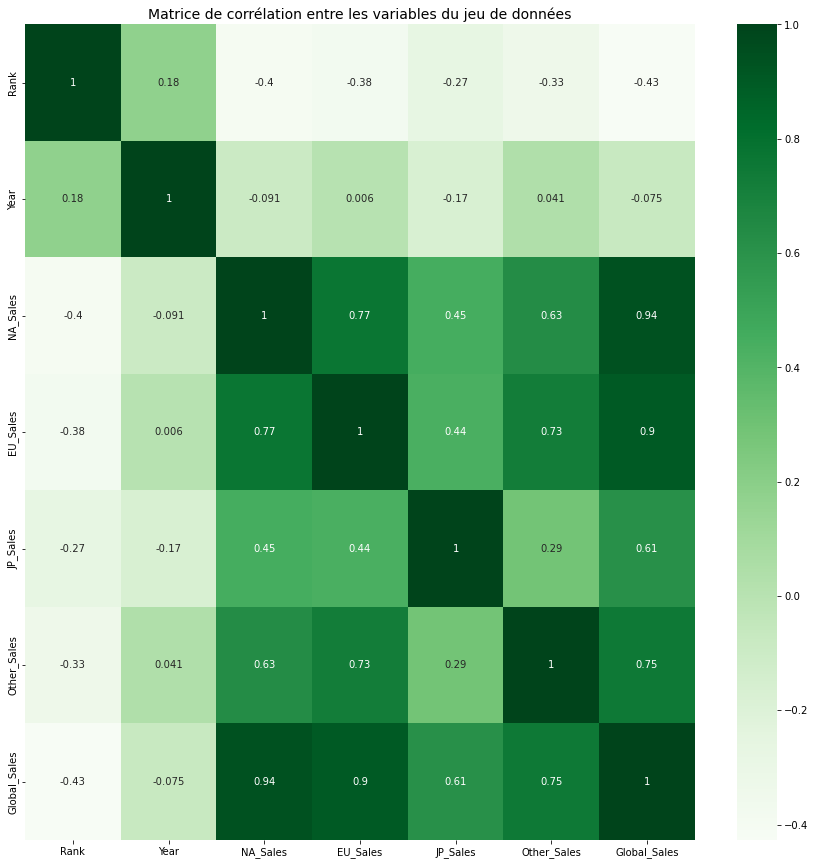

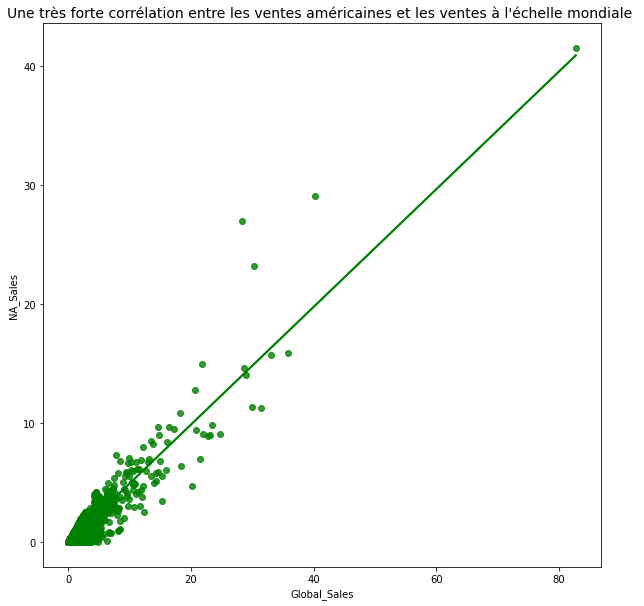

In [16]:
#Visualisation des données du dataframe: df_games 
#1 - corrélation entre les différentes variables du dataframe

plt.figure(figsize=(15,15))
sns.heatmap(df_games.corr(), annot =True,  cmap='Greens')
plt.title("Matrice de corrélation entre les variables du jeu de données" , fontsize=14);
# très fortes corrélation entre les ventes aux états des jeux vidéos et les ventes globales

#2 - verification que les ventes aux états unis et les ventes globales des jeux vidéos ont augmenté :
from scipy.stats import pearsonr
pd.DataFrame(pearsonr(df_games["Global_Sales"],df_games['NA_Sales']),index = ["coeff","p-value"],columns = ["resultat"])

#le coefficient de pearson : 0.941268 / p-value =0 (test signifiant )

#visualisation de la corrélation entre les deux variables : 
plt.figure(figsize=(10,10))
sns.regplot('Global_Sales', 'NA_Sales', data = df_games, ci=None, color = "green")
plt.title("Une très forte corrélation entre les ventes américaines et les ventes à l'échelle mondiale ", fontsize=14)



In [17]:
#Plateformes

df_games['Platform'].unique() # noms des plateformes 

df_games['Platform'].value_counts(normalize = True) 


DS      0.130642
PS2     0.130275
PS3     0.079868
Wii     0.079010
X360    0.075642
PSP     0.073314
PS      0.072824
PC      0.057757
GBA     0.049672
XB      0.049182
GC      0.033197
3DS     0.030624
PSV     0.025234
PS4     0.020579
N64     0.019354
SNES    0.014638
XOne    0.013046
SAT     0.010596
WiiU    0.008758
2600    0.007105
NES     0.006002
GB      0.005941
DC      0.003185
GEN     0.001654
NG      0.000735
SCD     0.000367
WS      0.000367
3DO     0.000184
TG16    0.000122
GG      0.000061
PCFX    0.000061
Name: Platform, dtype: float64

In [18]:
df_notes['Platform'].unique()
df_notes['Platform'].value_counts(normalize = True) 

PC                  0.270846
PlayStation 4       0.110480
Xbox 360            0.088019
Switch              0.074389
PlayStation 2       0.072568
PlayStation 3       0.067987
Xbox One            0.061200
Xbox                0.037084
Wii                 0.033442
DS                  0.032173
PSP                 0.025606
GameCube            0.023122
3DS                 0.021246
Game Boy Advance    0.018873
PlayStation Vita    0.014127
PlayStation 5       0.011258
Wii U               0.010209
PlayStation         0.009105
Xbox Series X       0.007395
Dreamcast           0.006677
Nintendo 64         0.003918
Stadia              0.000276
Name: Platform, dtype: float64

In [19]:
#Fusion des deux dataframes 
df_new = pd.merge(df_notes,df_games,on=["Name","Year"],how='inner')


In [20]:
df_new.to_csv('df_new.csv')

In [21]:
#affichage de la distribution des variables 
df_new.describe()  # ordre de grandeurs différents ; standardisation 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14107 entries, 0 to 14106
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          14107 non-null  object 
 1   Year          14107 non-null  int64  
 2   Platform_x    14107 non-null  object 
 3   Meta_scores   14107 non-null  int64  
 4   User_scores   14107 non-null  float64
 5   Rank          14107 non-null  int64  
 6   Platform_y    14107 non-null  object 
 7   Genre         14107 non-null  object 
 8   Publisher     14107 non-null  object 
 9   NA_Sales      14107 non-null  float64
 10  EU_Sales      14107 non-null  float64
 11  JP_Sales      14107 non-null  float64
 12  Other_Sales   14107 non-null  float64
 13  Global_Sales  14107 non-null  float64
dtypes: float64(6), int64(3), object(5)
memory usage: 1.6+ MB


In [22]:
df_new.sort_values(by ="Rank", ascending = True)


df_new.describe()

,Year,Meta_scores,User_scores,Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,14107.000000,14107.000000,14107.000000,14107.000000,14107.000000,14107.000000,14107.000000,14107.000000,14107.000000
mean,2007.607287,71.364429,7.059602,6219.771390,0.410630,0.245811,0.028786,0.089352,0.774728
std,3.962575,13.046519,1.293998,4358.819342,0.849037,0.596388,0.167408,0.229175,1.636341
min,1996.000000,17.000000,1.200000,1.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2005.000000,63.000000,6.400000,2541.000000,0.080000,0.020000,0.000000,0.010000,0.130000
50%,2007.000000,73.000000,7.300000,5345.000000,0.180000,0.070000,0.000000,0.030000,0.350000
75%,2011.000000,81.000000,8.000000,9353.000000,0.440000,0.240000,0.000000,0.090000,0.810000
max,2016.000000,99.000000,9.500000,16600.000000,41.490000,29.020000,6.500000,10.570000,82.740000


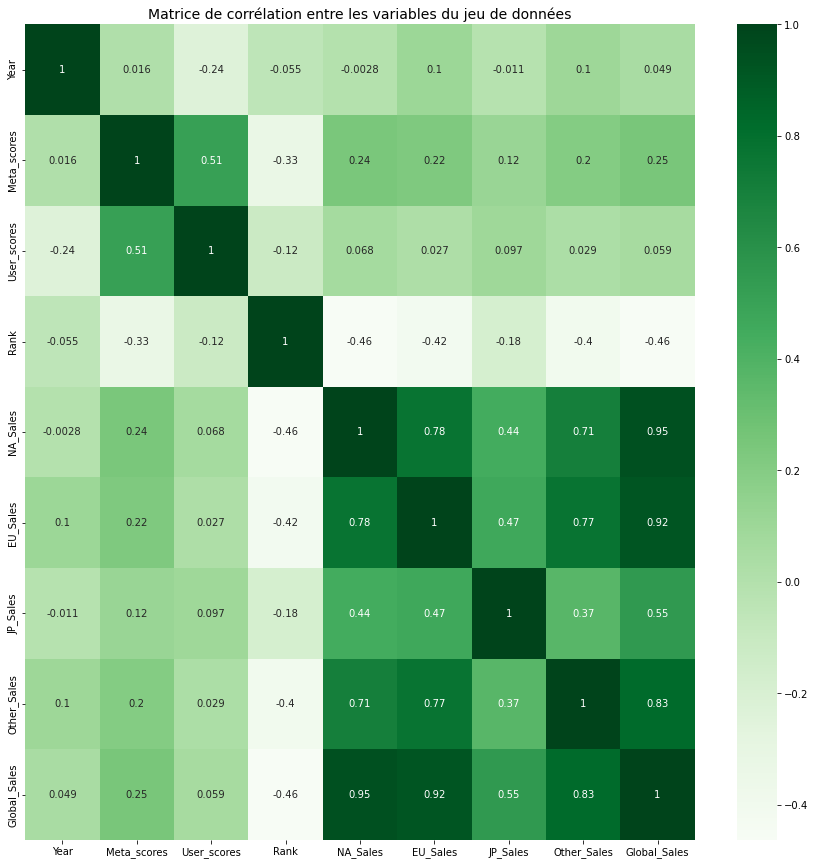

In [23]:
#Visualisation des données du dataframe: df_games 
#1 - corrélation entre les différentes variables du dataframe
#on constate que les volumes de vente de jeux vidéos sont très peu corrélées aux Meta_scores et User_scores

plt.figure(figsize=(15,15))
sns.heatmap(df_new.corr(), annot =True,  cmap='Greens')
plt.title("Matrice de corrélation entre les variables du jeu de données" , fontsize=14);


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          21 non-null     int64  
 1   Global_Sales  21 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


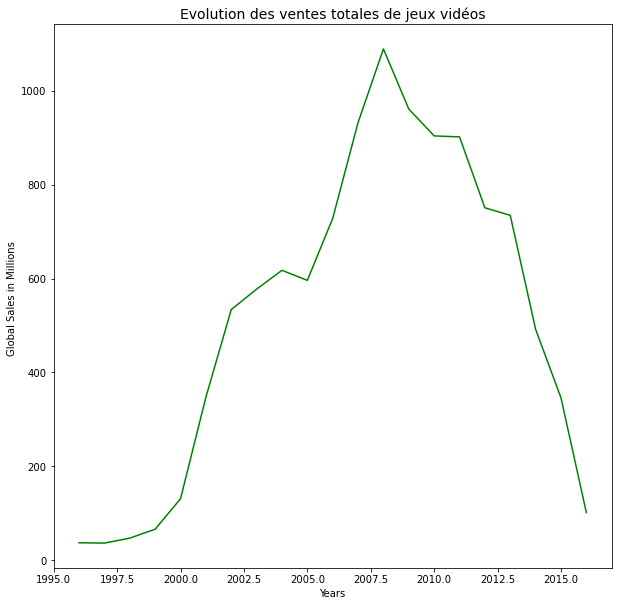

In [24]:
#Evolution de la vente des jeux vidéos de 1980 à aujourd'hui 


data_year = df_new.groupby(by=['Year'])['Global_Sales'].sum()
data_year = data_year.reset_index()
plt.figure(figsize=(10,10))
sns.lineplot(x = 'Year', y = 'Global_Sales', color = 'green', data =data_year)
plt.xlabel("Years")
plt.ylabel("Global Sales in Millions ")
plt.title("Evolution des ventes totales de jeux vidéos", fontsize=14); #pic année 1998





#Analyse ventes de jeux vidéos par genre : 

#df_new['Genre'].nunique() # 12 genres 

#df_new['Genre'].value_counts(normalize = True) # fréquence d'utilisation des jeux vidéos en fonction du genre
data_year.info()

In [107]:
#Evolution vente des jeux vidéos par continent 

JP_Sales = df_new.groupby(by='Year')['JP_Sales'].sum()
EU_Sales =df_new.groupby(by='Year')['EU_Sales'].sum()
NA_Sales = df_new.groupby(by= 'Year')['NA_Sales'].sum()
Global_Sales = df_new.groupby(by= 'Year')['Global_Sales'].sum()
Other_Sales= df_new.groupby(by= 'Year')['Other_Sales'].sum()

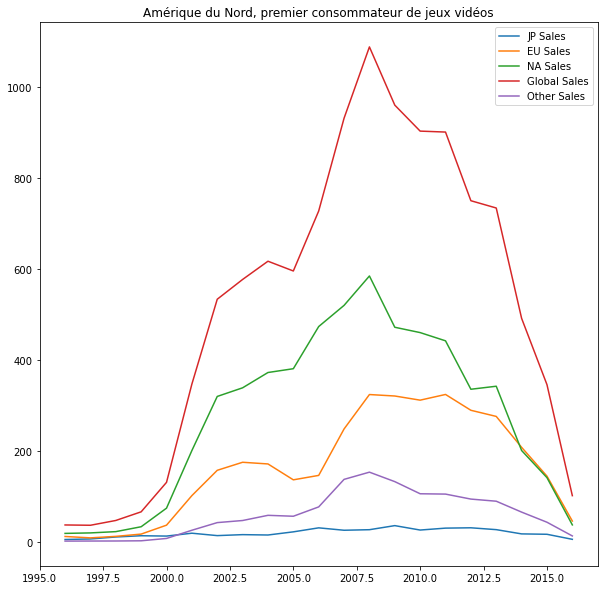

In [142]:
plt.figure(figsize =(10,10))
plt.title("Amérique du Nord, premier consommateur de jeux vidéos")
plt.plot(JP_Sales.index,JP_Sales.values)
plt.plot(EU_Sales.index,EU_Sales.values)
plt.plot(NA_Sales.index,NA_Sales.values)
plt.plot(Global_Sales.index,Global_Sales.values)
plt.plot(Other_Sales.index,Other_Sales.values)
plt.legend(['JP Sales', 'EU Sales','NA Sales', 'Global Sales', 'Other Sales'])

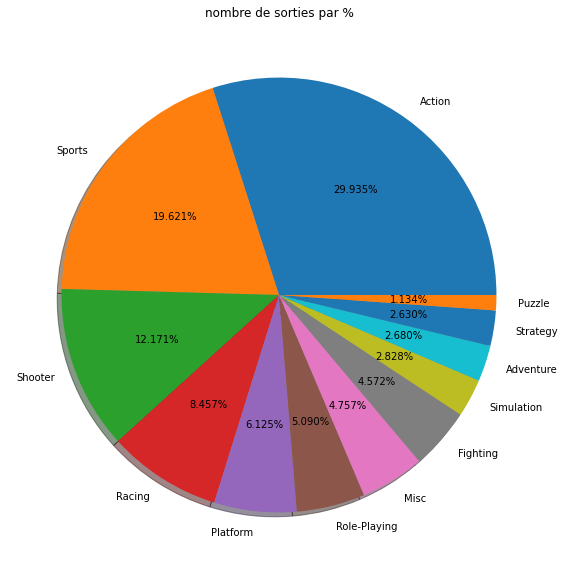

In [42]:
plt.figure(figsize= (10,10))
plt.title("répartition des j")
plt.pie(df_new['Genre'].value_counts(),labels=df_new['Genre'].value_counts().index,autopct="%.3f%%",shadow=True);

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


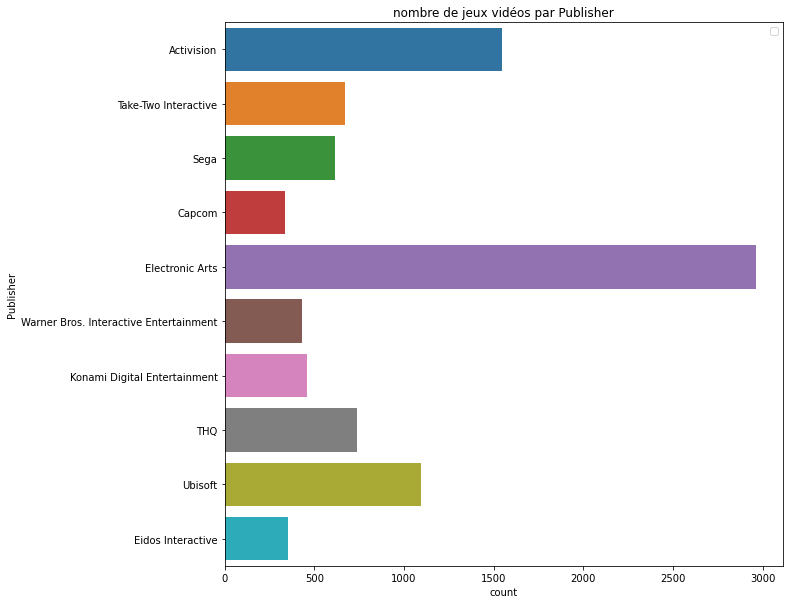

In [103]:

plt.figure(figsize = (10,10))
plt.title("nombre de jeux vidéos par Publisher")
top5 = df_new['Publisher'].value_counts()[:10]
top5_df = df_new[df_new['Publisher'].map(lambda row:row in top5)]
sns.countplot(y='Publisher',data=top5_df,orient='h')
plt.legend();




In [80]:
df_new_genre= df_new.groupby("Genre").agg({"Global_Sales": "sum"})



<Figure size 1152x1152 with 0 Axes>

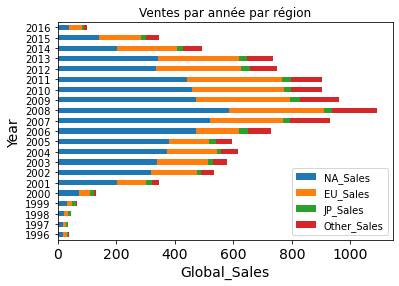

In [99]:

region_yearly_sales = pd.DataFrame(df_new.groupby('Year')[['NA_Sales',
                                'EU_Sales',
                                'JP_Sales',
                                'Other_Sales']].sum())
region_yearly_sales


plt.gcf().set_size_inches(16,16)
region_yearly_sales.plot(kind = 'barh', stacked =True, legend = 10)
plt.ylabel('Year', size = 14)
plt.xlabel('Global_Sales', size = 14)
plt.title('Ventes par année par région', size = 12)
plt.yticks(fontsize=10)
plt.xticks(fontsize=14)
plt.show();
